In [ ]:
import code.runners as gr
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [4]:
number_of_experiments = 10

In [4]:
policy_results = []
for i in range(number_of_experiments):
    policy_results.append(gr.run())

 25%|██▌       | 1272/5000 [07:42<22:36,  2.75it/s]


In [5]:
with open('policy_results.pkl_new', 'wb') as f:
    pickle.dump(policy_results, f)

In [5]:
policy_baseline_results = []
for i in range(number_of_experiments):
    policy_baseline_results.append(gr.run_with_baseline())

  5%|▌         | 260/5000 [00:50<15:23,  5.13it/s]  


KeyboardInterrupt: 

In [ ]:
with open('policy_baseline_results.pkl_new', 'wb') as f:
    pickle.dump(policy_baseline_results, f)

In [2]:
policy_actor_critic_results = []
for i in range(number_of_experiments):
    policy_actor_critic_results.append(gr.run_actor_critic())

 37%|███▋      | 1832/5000 [05:15<23:03,  2.29it/s]

In [ ]:
with open('policy_actor_critic_results.pkl_new', 'wb') as f:
    pickle.dump(policy_actor_critic_results, f)

In [8]:
# load the results
# with open('result_score/policy_results.pkl_new', 'rb') as f:
#     policy_results = pickle.load(f)
# 
# with open('result_score/policy_baseline_results_new.pkl', 'rb') as f:
#     policy_baseline_results = pickle.load(f)
# 
# with open('../result_score/policy_actor_critic_results_new.pkl', 'rb') as f:
#     policy_actor_critic_results = pickle.load(f)


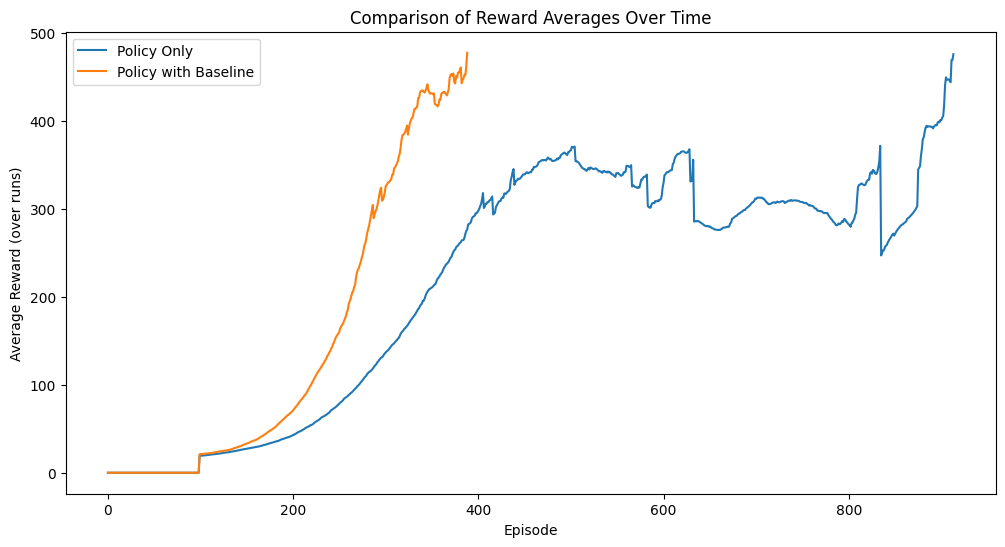

In [25]:
def calculate_mean_of_averages(results_list):
    # Determine the maximum length of 'Average_100' lists
    max_length = max(len(results['Average_100']) for results in results_list)
    
    # Pad shorter lists with NaN and create a NumPy array
    padded_averages = np.array([results['Average_100'] + [np.nan]*(max_length - len(results['Average_100'])) for results in results_list])
    
    # Calculate the mean of these averages at each episode, ignoring NaN values
    mean_of_averages = np.nanmean(padded_averages, axis=0)
    return mean_of_averages

# Then, you can use this function as before:
mean_of_averages_policy = calculate_mean_of_averages(policy_results)
mean_of_averages_policy_baseline = calculate_mean_of_averages(policy_baseline_results)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(mean_of_averages_policy, label='Policy Only')
plt.plot(mean_of_averages_policy_baseline, label='Policy with Baseline')
plt.xlabel('Episode')
plt.ylabel('Average Reward (over runs)')
plt.title('Comparison of Reward Averages Over Time')
plt.legend()
plt.show()


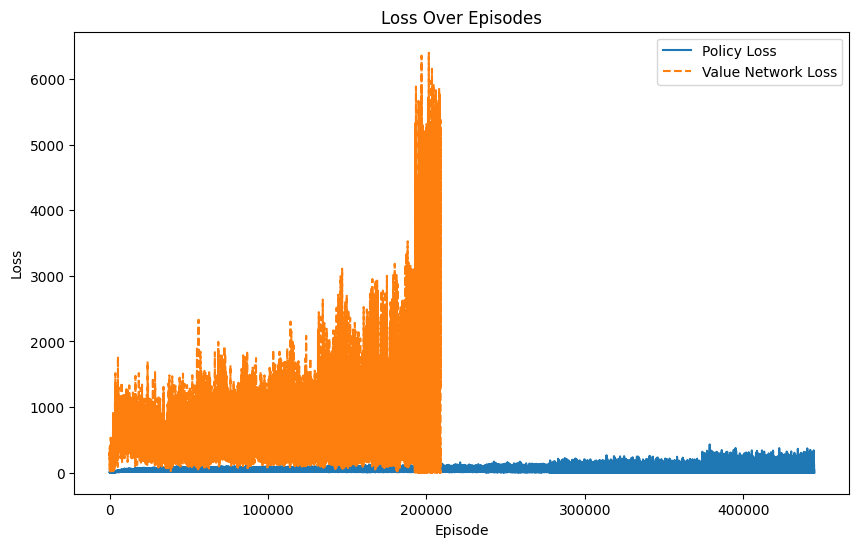

In [28]:
# Assuming you have functions or logic to calculate mean losses similar to mean_of_averages
mean_loss_policy = calculate_mean_of_averages([{'Average_100': res['Loss']} for res in policy_results])
mean_loss_value = calculate_mean_of_averages([{'Average_100': res['LossV']} for res in policy_baseline_results])

plt.figure(figsize=(10, 6))
plt.plot(mean_loss_policy, label='Policy Loss')
plt.plot(mean_loss_value, label='Value Network Loss', linestyle='--')
plt.xlabel('Episode')
plt.ylabel('Loss')
plt.title('Loss Over Episodes')
plt.legend()
plt.show()


Policy Average Final Reward: 322.2 ± 97.57335701921915
Policy with Baseline Average Final Reward: 292.5 ± 148.20070850033073


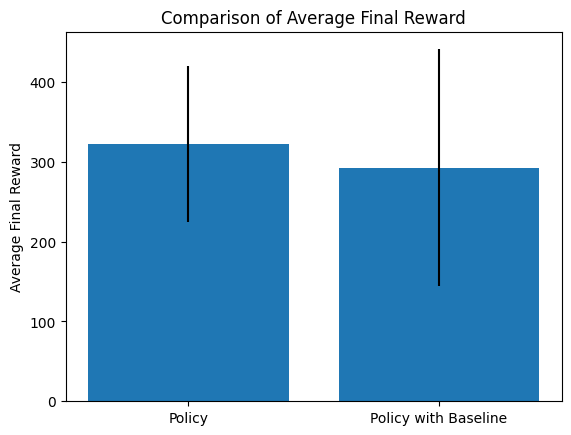

In [20]:
def compare_final_performance(policy_results, policy_baseline_results):
    policy_final_rewards = [results['Reward'][-1] for results in policy_results]
    policy_baseline_final_rewards = [results['Reward'][-1] for results in policy_baseline_results]

    print(f"Policy Average Final Reward: {np.mean(policy_final_rewards)} ± {np.std(policy_final_rewards)}")
    print(f"Policy with Baseline Average Final Reward: {np.mean(policy_baseline_final_rewards)} ± {np.std(policy_baseline_final_rewards)}")

    # Plot
    plt.bar(['Policy', 'Policy with Baseline'], [np.mean(policy_final_rewards), np.mean(policy_baseline_final_rewards)], 
            yerr=[np.std(policy_final_rewards), np.std(policy_baseline_final_rewards)])
    plt.ylabel('Average Final Reward')
    plt.title('Comparison of Average Final Reward')
    plt.show()

compare_final_performance(policy_results, policy_baseline_results)


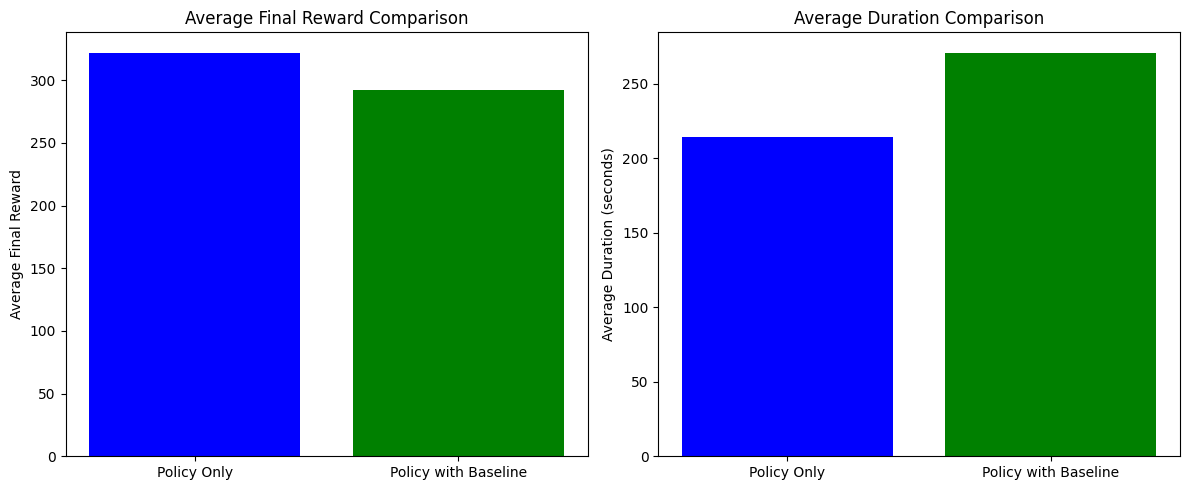

Policy Only - Average Final Reward: 322.20, Average Duration: 214.25 seconds
Policy with Baseline - Average Final Reward: 292.50, Average Duration: 270.86 seconds


In [30]:
def compare_average_final_and_duration_visual(policy_results, policy_baseline_results):
    # Final rewards
    final_rewards_policy = [results['Reward'][-1] for results in policy_results]
    final_rewards_policy_baseline = [results['Reward'][-1] for results in policy_baseline_results]

    # Duration
    durations_policy = [results['Duration'] for results in policy_results]
    durations_policy_baseline = [results['Duration'] for results in policy_baseline_results]

    # Calculating means
    avg_final_reward_policy = np.mean(final_rewards_policy)
    avg_final_reward_policy_baseline = np.mean(final_rewards_policy_baseline)
    avg_duration_policy = np.mean(durations_policy)
    avg_duration_policy_baseline = np.mean(durations_policy_baseline)

    # Plotting Final Rewards Comparison
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.bar(['Policy Only', 'Policy with Baseline'], [avg_final_reward_policy, avg_final_reward_policy_baseline], color=['blue', 'green'])
    plt.ylabel('Average Final Reward')
    plt.title('Average Final Reward Comparison')

    # Plotting Durations Comparison
    plt.subplot(1, 2, 2)
    plt.bar(['Policy Only', 'Policy with Baseline'], [avg_duration_policy, avg_duration_policy_baseline], color=['blue', 'green'])
    plt.ylabel('Average Duration (seconds)')
    plt.title('Average Duration Comparison')

    plt.tight_layout()
    plt.show()

    # Print results for reference
    print(f"Policy Only - Average Final Reward: {avg_final_reward_policy:.2f}, Average Duration: {avg_duration_policy:.2f} seconds")
    print(f"Policy with Baseline - Average Final Reward: {avg_final_reward_policy_baseline:.2f}, Average Duration: {avg_duration_policy_baseline:.2f} seconds")

# Call the function with your results
compare_average_final_and_duration_visual(policy_results, policy_baseline_results)


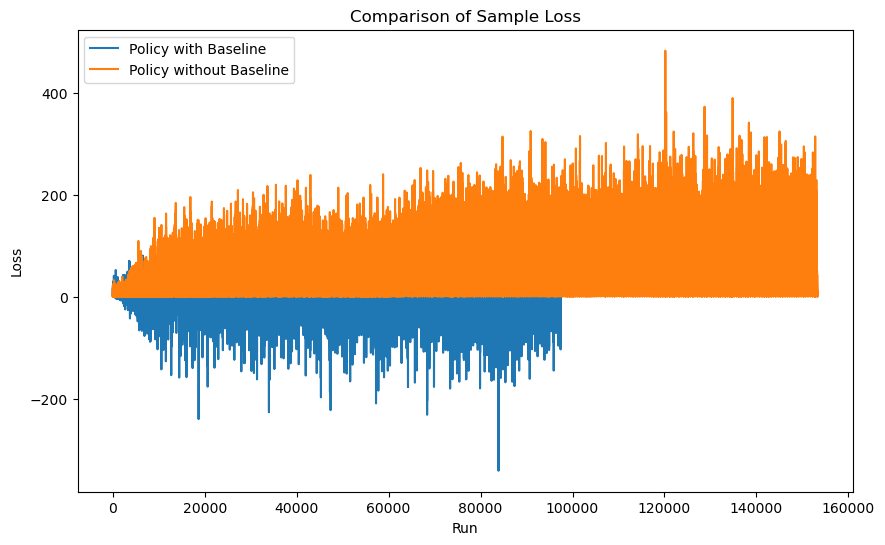

In [15]:
losses_baseline = policy_baseline_results[1]['loss']     
losses_policy = policy_results[1]['loss']

plt.figure(figsize=(10, 6))
plt.plot(losses_baseline, label='Policy with Baseline')
plt.plot(losses_policy, label='Policy without Baseline')
plt.xlabel('Run')
plt.ylabel('Loss')
plt.title(f'Comparison of Sample losses')
plt.legend()
plt.show()

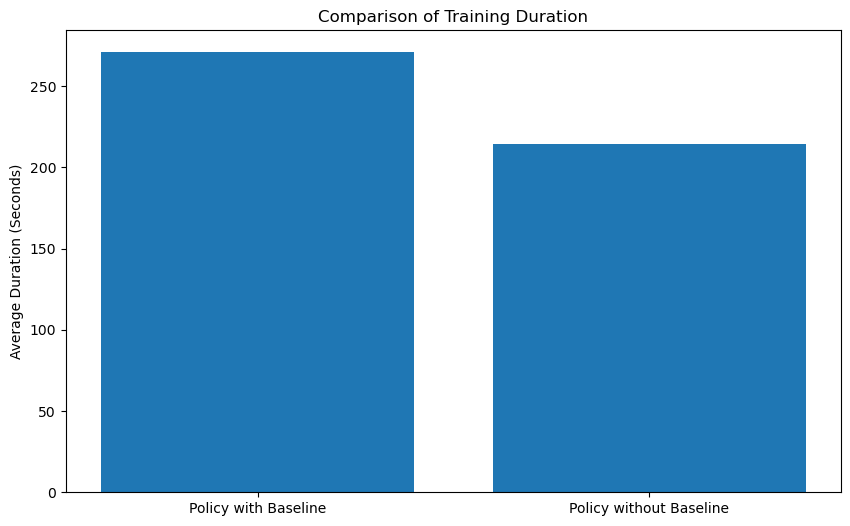

In [17]:
durations_baseline = [result['Duration'] for result in policy_baseline_results]
durations_policy = [result['Duration'] for result in policy_results]

plt.figure(figsize=(10, 6))
plt.bar(['Policy with Baseline', 'Policy without Baseline'], [np.mean(durations_baseline), np.mean(durations_policy)])
plt.ylabel('Average Duration (Seconds)')
plt.title('Comparison of Training Duration')
plt.show()

In [6]:
def average_solved_episode(results_list):
    solved_episodes = [result['Solved'] for result in results_list if result['Solved'] != -1]
    return np.mean(solved_episodes) if solved_episodes else None

print("Average solved episode (Policy with Baseline):", average_solved_episode(policy_baseline_results))
print("Average solved episode (Policy without Baseline):", average_solved_episode(policy_results))


Average solved episode (Policy with Baseline): 567.3
Average solved episode (Policy without Baseline): 881.8


In [7]:
def average_reward(results_list, last_n_episodes=100):
    all_rewards = np.concatenate([result['Reward'][-last_n_episodes:] for result in results_list])
    return np.mean(all_rewards)

print("Average reward over last 100 episodes (Policy with Baseline):", average_reward(policy_baseline_results))
print("Average reward over last 100 episodes (Policy without Baseline):", average_reward(policy_results))


Average reward over last 100 episodes (Policy with Baseline): 274.907
Average reward over last 100 episodes (Policy without Baseline): 283.992


In [8]:
def average_loss(results_list, loss_key='Loss'):
    all_losses = np.concatenate([result[loss_key] for result in results_list])
    return np.mean(all_losses)

print("Average policy loss (Policy with Baseline):", average_loss(policy_baseline_results))
print("Average policy loss (Policy without Baseline):", average_loss(policy_results))

# If using a baseline, also compute its loss
if 'LossV' in policy_baseline_results[0]:
    print("Average value loss (Policy with Baseline):", average_loss(policy_baseline_results, 'LossV'))


Average policy loss (Policy with Baseline): 0.5632921
Average policy loss (Policy without Baseline): 40.741302
Average value loss (Policy with Baseline): 521.1394


In [18]:
losses_baseline = policy_baseline_results[1]['loss']     
losses_policy = policy_results[1]['loss']
# losses_actor_critic = policy_actor_critic_results[1]['loss']

plt.figure(figsize=(10, 6))
plt.plot(losses_baseline, label='Policy with Baseline')
plt.plot(losses_policy, label='Policy without Baseline')
# plt.plot(losses_actor_critic, label='Actor-Critic')
plt.xlabel('Run')
plt.ylabel('Loss')
plt.title(f'Comparison of Sample losses')
plt.legend()
plt.show()

KeyError: 'loss'

In [ ]:
def calculate_statistics(results_list):
    solved_episodes = [result['Solved'] for result in results_list if result['Solved'] != -1]
    mean_solved = np.mean(solved_episodes)
    variance_solved = np.var(solved_episodes)
    return mean_solved, variance_solved

# Calculate statistics for each method
mean_solved_policy, var_solved_policy = calculate_statistics(policy_results)
mean_solved_policy_baseline, var_solved_policy_baseline = calculate_statistics(policy_baseline_results)
mean_solved_actor_critic, var_solved_actor_critic = calculate_statistics(policy_actor_critic_results)

In [ ]:
# Define labels, positions, mean values and error (variance)
labels = ['Policy', 'Policy with Baseline', 'Actor-Critic']
x_pos = np.arange(len(labels))
means = [mean_solved_policy, mean_solved_policy_baseline, mean_solved_actor_critic]
errors = [var_solved_policy, var_solved_policy_baseline, var_solved_actor_critic]

# Build the plot
plt.figure(figsize=(10, 8))
plt.bar(x_pos, means, yerr=errors, align='center', alpha=0.7, ecolor='black', capsize=10)
plt.xticks(x_pos, labels)
plt.xlabel('Methods')
plt.ylabel('Solved Episode')
plt.title('Average Solved Episode with Variance')
plt.tight_layout()

# Save the figure and show
plt.savefig('average_solved_variance.png')
plt.show()